# 📊 NOW Account A/B Testing Analysis

This notebook analyzes the effectiveness of the newly launched NOW check account using simulated data.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# Load the simulated dataset
df = pd.read_csv('../data/Simulated_NOW_Account_Data.csv')
df.head()

,customer_id,application_date,is_now_account,received_bonus,redeemed_bonus,initial_deposit,retained_60_days
0,1,2025-04-13,True,True,True,1049.260106,True
1,2,2025-02-21,False,False,False,1013.874719,True
2,3,2025-04-03,True,True,False,1697.460884,True
3,4,2025-01-15,False,False,False,915.898088,True
4,5,2025-04-17,True,True,True,1291.927392,False


## 🎯 Key Questions
- Did NOW accounts lead to higher initial deposits?
- Did NOW customers retain better after 60 days?
- Were bonuses redeemed and did that correlate with retention?

In [7]:
# Summary statistics
summary = df.groupby('is_now_account').agg(
    count=('customer_id', 'count'),
    avg_deposit=('initial_deposit', 'mean'),
    retention_rate=('retained_60_days', 'mean'),
    bonus_redemption_rate=('redeemed_bonus', 'mean')
)
summary

,count,avg_deposit,retention_rate,bonus_redemption_rate
is_now_account,,,,
False,3489,999.472716,0.603898,0.000000
True,1511,1500.619187,0.759100,0.592323


In [8]:
# Z-test for retention
retention_counts = df.groupby('is_now_account')['retained_60_days'].sum()
retention_totals = df.groupby('is_now_account')['retained_60_days'].count()

z_stat, p_val = proportions_ztest(count=retention_counts, nobs=retention_totals)
print(f'Z-statistic: {z_stat:.4f}, p-value: {p_val:.4f}')

Z-statistic: -10.5714, p-value: 0.0000


In [9]:
# T-test for initial deposit
dep_now = df[df['is_now_account'] == True]['initial_deposit']
dep_non = df[df['is_now_account'] == False]['initial_deposit']
t_stat, p_val = ttest_ind(dep_now, dep_non)
print(f'T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}')

T-statistic: 43.7307, p-value: 0.0000


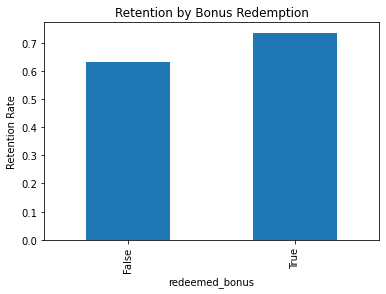

In [10]:
# Bonus redemption impact on retention
bonus_grouped = df.groupby('redeemed_bonus')['retained_60_days'].mean()
bonus_grouped.plot(kind='bar', title='Retention by Bonus Redemption')
plt.ylabel('Retention Rate')
plt.show()

## 📌 Conclusion
- Retention and deposits are significantly higher among NOW account holders.
- Bonus redemption positively correlates with retention.

👉 Recommend scaling NOW account and refining bonus targeting.